# Grade: /100 pts

# Lab Assignment 04: Regularization

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 500)

%matplotlib inline

### Question1: Preprocessing (5pt)
**Make sure to only use the imports included in the first cell. Any additional imports used will result in 0.** <br>
Tasks:
* Load the data present in 'footballer_small.csv' using the pandas library and store the loaded data in a dataframe
* Drop the variables: 'ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'
* Dummy code the variables: work_rate_att, work_rate_def, preferred_foot. **Because we are running a regularized model, we do not want to drop the first column**
* Get a test data set of size 500 - to make results comparable to solutions, set random_state = 0 <br>

In [13]:
df=pd.read_csv('footballer_small.csv')
df=df.drop(['ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'],axis=1)
df=pd.concat([df.drop(['work_rate_att','work_rate_def','preferred_foot'], axis=1),
              pd.get_dummies(df[['work_rate_att','work_rate_def','preferred_foot']])],axis=1)
y=df.overall
x=df.drop(['overall'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=500,random_state=0)

df.head()


,age,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,work_rate_att_High,work_rate_att_Low,work_rate_att_Medium,work_rate_def_High,work_rate_def_Low,work_rate_def_Medium,preferred_foot_Left,preferred_foot_Right
0,29,186.0,82.0,68,70,50,56,61,66,74,1,2,3,58,44,65,59,49,56,48,42,58,68,64,74,66,62,59,59,80,73,76,51,70,64,43,52,69,65,63,70,0,0,1,0,0,1,0,1
1,21,194.0,87.0,59,61,57,53,61,45,54,1,1,2,15,19,15,25,13,16,16,15,19,18,48,42,40,57,33,20,44,39,56,14,25,23,12,26,22,22,15,16,0,0,1,0,0,1,0,1
2,23,175.0,72.0,65,85,28,55,62,60,68,1,2,2,60,22,54,58,24,59,30,35,57,62,88,83,70,53,75,43,73,79,65,24,58,52,48,55,31,34,60,67,0,0,1,1,0,0,0,1
3,26,185.0,80.0,73,76,54,67,73,69,78,1,2,3,76,41,60,64,52,75,59,40,73,73,73,78,67,68,63,65,70,87,79,74,67,75,68,68,38,66,66,69,0,0,1,0,0,1,0,1
4,19,182.0,76.0,48,47,46,51,50,39,47,1,1,2,14,11,13,26,12,14,11,11,22,15,37,41,33,45,43,18,56,28,49,12,18,12,12,25,16,38,12,12,0,0,1,0,0,1,0,1


## Question 2: Building the pipeline that preprocesses the data (10pts)
In order to properly build the regression model, the features need to be standardized so that no feature can dominate others in determining the prediction values due to differences in feature scales. 

**1.** Build the pipeline that **preprocesses** the feature columns of the training data and **create** a linear regression model. 

**2.** Plot the data **before** and **after** the standardization for the stamina feature. <br>

*NOTE: In this question, there is no need to overwrite the training set's values. Create a new variable to include the standardized data. The original training data is needed for future exercises.*

**3.** **Question**: Make observations about the plots.  

Answers: The plot are visually identical  but the values for the standardized values of stamina have a mean of zero and lower standard deviation than the original data. They also have differnt densities due to modified scale.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Unscaled stamina density')

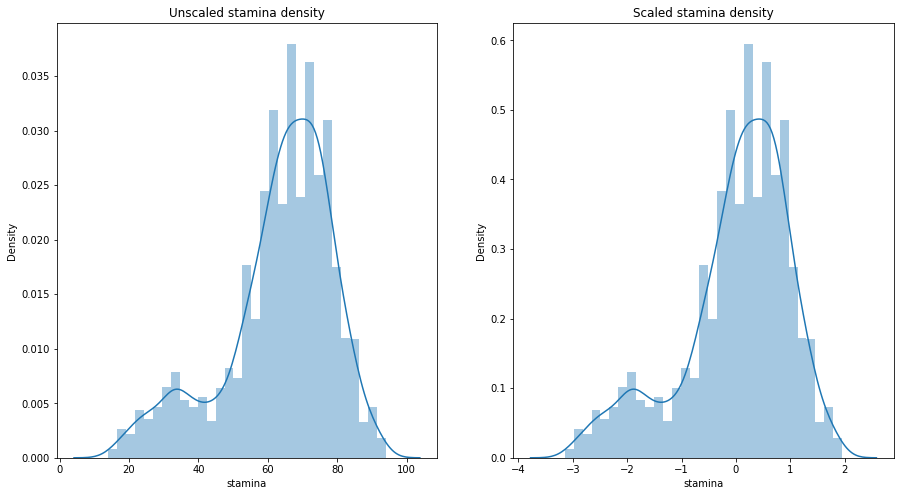

In [14]:
stamina_train= X_train.stamina

pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('linear_regression',sk.linear_model.LinearRegression())
])

scaled_stamina=pipeline.named_steps['scaler'].fit_transform(X_train)[:,29]

fig,ax=plt.subplots(ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

unscaled=sns.distplot(stamina_train,ax=ax[0])
scaled=sns.distplot(scaled_stamina, ax=ax[1])
plt.xlabel('stamina')
plt.title('Scaled stamina density')
unscaled.set_title('Unscaled stamina density')

## Question 3: Creating a Complex feature model using 2-nd Polynomial features (10pts)
In this task, the training data consists of the quadratic terms and 2-way interactions of all features except one of standing_tackle, composure, and marking variable. <br> 

**1.** Create <b> four </b> different training sets:
* The first training set includes the quadratic terms and 2-way interactions of all the features. 
* The second/third/fourth training sets include all the features, their quadratic terms, and their 2-way interactions except the standing_tackle/composure/marking features. <br>

***Hint:*** *For the 2nd/3rd and 4th training sets, create the training sets without the aforementioned features and then apply polynomial expansion to the resultant sets.* 

**2.** **Questions:**
* How many **linear terms** are in each of the new feature set?

Answer: The number of linear term is 48 for the first feature and 47 for the others
* How many **squared terms** are in each of the new feature set? 

Answer: The number of squared terms is 49x48/2=1152 for the first feature set and 48x47/2=1128 for the others


* How many **interaction terms** are in each of the new feature set? Give an **example of one of the interaction terms**. 

Answer: The number of interaction terms is 1152-48=1104 for the first feature set and 1128-47=1081 for the others. This is because the match.

In [15]:
poly_features=PolynomialFeatures(degree=2)

all_feature_fit=poly_features.fit_transform(X_train)

training_no_standing= poly_features.fit_transform(X_train.drop(['standing_tackle'],axis=1))

training_no_composure=poly_features.fit_transform(X_train.drop(['composure'],axis=1))

training_no_marking=poly_features.fit_transform(X_train.drop(['marking'],axis=1))

## Question 4: Evaluating the backward feature search (15 pts)
In this question, you have to **use the pipeline created in question 2 and apply it to each of the training sets created in question 3**. Use 10-fold cross validation to report the validation error** on the training set using mean squared error as the metric. <br>

Show all the steps of the process and compare and analyze the results using the validation error reported. 

In [16]:
#Function for scoring
def mse(y,y_pred):
  return np.mean((y-y_pred)**2)
# Make it usable
scorer=sk.metrics.make_scorer(mse)

# Apply the pipeline and get the cross_val_score 
def cv_standard(X,pipeline=pipeline):
  return cross_val_score(estimator=pipeline,X=X,y=y_train,cv=10,scoring=scorer)

train1_cv=cv_standard(all_feature_fit)
train2_cv=cv_standard(training_no_standing)
train3_cv=cv_standard(training_no_composure)
train4_cv=cv_standard(training_no_marking)

print(f"CV Loss for set 1: {train1_cv.mean()}")
print(f"CV Loss for set 2: {train2_cv.mean()}")
print(f"CV Loss for set 3: {train3_cv.mean()}")
print(f"CV Loss for set 4: {train4_cv.mean()}")

CV Loss for set 1: 2.9748959084761144
CV Loss for set 2: 2.753807085542691
CV Loss for set 3: 2.8059211437781832
CV Loss for set 4: 2.696759880987279


## Question 5: Applying Ridge Regression (10 pts)

**1.** Build a pipeline that performs **scaling** and **fits the ridge regression** on the data that includes the polynomial expansion of all the features. The penalization parameter is set to 0.5. 

**2.** Use the pipeline to report the validation error using mean square error metric. Use 10-fold cross validation. 

In [17]:
rr_pipeline= Pipeline([
    ('scaler',StandardScaler()),
    ('ridge_regression',Ridge(alpha=0.5,fit_intercept=True))
])
rr_scores=cv_standard(all_feature_fit,rr_pipeline)

print(f"CV Loss for set 1: {rr_scores.mean()}")


CV Loss for set 1: 1.7146770020409245


## Question 6: Tune the Ridge coefficient for the 2nd-order model   (15pt)
**1.** Now use 10-fold CV on the training set to determine a good setting for the regularization coefficient. Perform the search going from $\lambda = \exp(-8), \cdots, \exp(6)$ in 15 evenly spaced increments on the log scale. Plot the mean squared error as a function of $\log(\lambda)$. 


**2.** **Questions:**
* What is the best regularization parameter (actual not approximate)? 

Answer: The best regularization parameter can be found from the best_params_ attribute of GidSearchCV(). In this case it will give us ridge_regression_alpha.

* Why does the error increase as $\lambda \rightarrow 0?$  Why does the error increase when $\lambda \rightarrow \infty$?  Answer in terms of the bias variance trade off.

Answer: Varience increase as $\lambda \rightarrow\ 0$ and bias increases as $\lambda \rightarrow \infty$


best param: {'ridge_regression__alpha': 7.38905609893065}


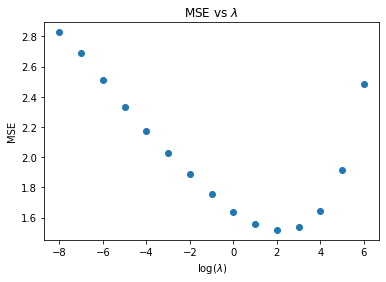

In [18]:
search_space_base=np.linspace(-8,6,15)
search_space=np.exp(search_space_base)
params= {'ridge_regression__alpha':search_space}

gscv=GridSearchCV(rr_pipeline,param_grid=params,scoring="neg_mean_squared_error", refit=True, cv=10)
gscv.fit(poly_features.fit_transform(X_train),y_train)

plt.scatter(search_space_base, -pd.DataFrame(gscv.cv_results_).mean_test_score)
plt.title('MSE vs $\lambda$')
plt.ylabel('MSE')
plt.xlabel('log($\lambda$)')
print(f"best param: {gscv.best_params_}")

### Question 7: Test error  (10pt)
Now test how the ridge model, fitted to the whole training set, performs on the test data set. 


Report the following:

* The mean squared error on the test data - along with the 95% confidence interval, determined with the central limit theorem. 
* The proportion of the variance explained by your model - along wth a 95% confidence interval.

In [19]:
X_test_expand=poly_features.fit_transform(X_test)
pred_Y=gscv.predict(X_test_expand)

squared_error=(y_test-pred_Y)**2
mse_test=squared_error.mean()

print(f'MSE:{mse_test}')
confidence_interval_mid=1.96*np.std(squared_error)/(len(pred_Y)**0.5)
confi=[mse_test-confidence_interval_mid,mse_test+confidence_interval_mid]
print(f'{mse_test-confidence_interval_mid} to {mse_test+confidence_interval_mid}')

mean_def=(y_test-y_test.mean())**2
print('Proportion variance predicted:', 1-mse_test/mean_def.mean())
print('95% CI:', [1-confi[1]/mean_def.mean(),1-confi[0]/mean_def.mean()])


MSE:1.7057441746268562
1.3818374623997545 to 2.029650886853958
Proportion variance predicted: 0.9669042125842215
95% CI: [0.9606195962567133, 0.9731888289117296]


## Question 8: Analyzing Ridge Coefficients (15 pts)
In this question:

**1.** you are first required to extract all the coefficients of the standing tackle, composure and marking features from the best model of question 7. 

**2.** After that, calculate the mean of the coefficients of the aforementioned features and analyze the results. 

**3.** **Question:** Based on these observations, draw conclusions about the results in question 4. 

In [20]:
second_order_names=poly_features.get_feature_names(X_train.columns)
second_order_coefs=np.array(gscv.best_estimator_.named_steps['ridge_regression'].coef_)

def coef_grab(term):
  return [second_order_coefs[i] for i in range (len(second_order_names)) if term in second_order_names[i]]

dcoefs={'standing_tackle':coef_grab('standing_tackle'),
        'composure':coef_grab('composure'),
        'marking':coef_grab('marking')}
for k in dcoefs:
  print(f'{k}:{np.mean(dcoefs[k])}')

standing_tackle:0.02368703210559125
composure:0.01796384017182657
marking:0.01433684651806298


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Question 9: Lasso Regression (10pts)
Let us assume that you are building a linear regression model using only three features "standing tackle", "marking", and "composure" to predict a player's overall rating. 

**Question:** Based on the results of question 8, what do you think will be the features' coefficients while applying the lasso regression optimization? Answer in no more than 5 sentences. 

Answer: The coefficents related to standing_tackle will be the largest and also it will be a larger proportionally then Ridge regression. The marking coefficents will be the smallest and smaller compared to ridge regression. Lasso regression can shrink some features to zero depending on their coefficents so the order of shrinking will be Marking first, then composure and then leaving standing_tackle to be only coefficent.


SyntaxError: ignored

## Note: 
After completing all the tasks and before submitting: 
* Restart you kernel by clicking 'Restart & Run all'
* Fix any errors resulting from the first step.
* Repeat the first two steps until no errors are encountered. 